# Import packages and dataset

In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

In [3]:
NUM_CLASSES = 5

# Splitting data 

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# linear Sequential model using keras

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 42)                0         
_________________________________________________________________
dense (Dense)                (None, 20)                860       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
Total params: 1,125
Trainable params: 1,125
Non-trainable params: 0
_________________________________________________________________


In [9]:

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)

es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
29/29 [==============================] - 1s 14ms/step - loss: 1.5490 - accuracy: 0.2382 - val_loss: 1.4357 - val_accuracy: 0.3638

Epoch 00001: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 2/1000
29/29 [==============================] - 0s 8ms/step - loss: 1.4078 - accuracy: 0.3341 - val_loss: 1.3263 - val_accuracy: 0.3638

Epoch 00002: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 3/1000
29/29 [==============================] - 0s 8ms/step - loss: 1.3269 - accuracy: 0.3847 - val_loss: 1.2567 - val_accuracy: 0.4241

Epoch 00003: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 4/1000
29/29 [==============================] - 0s 4ms/step - loss: 1.2751 - accuracy: 0.4078 - val_loss: 1.2039 - val_accuracy: 0.4641

Epoch 00004: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 5/1000
29/29 [==============================] - 0s 4ms/step - loss: 1.2369 - accuracy: 0.4421 - val_l


Epoch 00037: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 38/1000
29/29 [==============================] - 0s 8ms/step - loss: 0.6674 - accuracy: 0.7488 - val_loss: 0.3832 - val_accuracy: 0.8883

Epoch 00038: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 39/1000
29/29 [==============================] - 0s 8ms/step - loss: 0.6706 - accuracy: 0.7458 - val_loss: 0.3813 - val_accuracy: 0.8948

Epoch 00039: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 40/1000
29/29 [==============================] - 0s 8ms/step - loss: 0.6845 - accuracy: 0.7363 - val_loss: 0.3858 - val_accuracy: 0.8948

Epoch 00040: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 41/1000
29/29 [==============================] - 0s 8ms/step - loss: 0.6598 - accuracy: 0.7537 - val_loss: 0.3800 - val_accuracy: 0.8931

Epoch 00041: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 42/1000
29/29 [==

29/29 [==============================] - 0s 8ms/step - loss: 0.5530 - accuracy: 0.7980 - val_loss: 0.2619 - val_accuracy: 0.9078

Epoch 00110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 111/1000
29/29 [==============================] - 0s 9ms/step - loss: 0.5491 - accuracy: 0.7936 - val_loss: 0.2561 - val_accuracy: 0.9144

Epoch 00111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 112/1000
29/29 [==============================] - 0s 8ms/step - loss: 0.5432 - accuracy: 0.7974 - val_loss: 0.2563 - val_accuracy: 0.9135

Epoch 00112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 113/1000
29/29 [==============================] - 0s 8ms/step - loss: 0.5501 - accuracy: 0.7939 - val_loss: 0.2558 - val_accuracy: 0.9135

Epoch 00113: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 114/1000
29/29 [==============================] - 0s 8ms/step - loss: 0.5574 - accuracy: 0.7896 - val_loss: 0


Epoch 00146: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 147/1000
29/29 [==============================] - 0s 7ms/step - loss: 0.5209 - accuracy: 0.8097 - val_loss: 0.2294 - val_accuracy: 0.9413

Epoch 00147: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 148/1000
29/29 [==============================] - 0s 8ms/step - loss: 0.4944 - accuracy: 0.8105 - val_loss: 0.2263 - val_accuracy: 0.9437

Epoch 00148: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 149/1000
29/29 [==============================] - ETA: 0s - loss: 0.5195 - accuracy: 0.80 - 0s 8ms/step - loss: 0.5244 - accuracy: 0.8056 - val_loss: 0.2308 - val_accuracy: 0.9454

Epoch 00149: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 150/1000
29/29 [==============================] - 0s 8ms/step - loss: 0.5161 - accuracy: 0.8105 - val_loss: 0.2321 - val_accuracy: 0.9372

Epoch 00150: saving model to model/keypoint_classifier\ke

Epoch 183/1000
29/29 [==============================] - 0s 8ms/step - loss: 0.5064 - accuracy: 0.8072 - val_loss: 0.2089 - val_accuracy: 0.9576

Epoch 00183: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 184/1000
29/29 [==============================] - 0s 7ms/step - loss: 0.4885 - accuracy: 0.8170 - val_loss: 0.2092 - val_accuracy: 0.9535

Epoch 00184: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 185/1000
29/29 [==============================] - 0s 8ms/step - loss: 0.5053 - accuracy: 0.8094 - val_loss: 0.2199 - val_accuracy: 0.9405

Epoch 00185: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 186/1000
29/29 [==============================] - 0s 7ms/step - loss: 0.4861 - accuracy: 0.8192 - val_loss: 0.2084 - val_accuracy: 0.9502

Epoch 00186: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 187/1000
29/29 [==============================] - 0s 7ms/step - loss: 0.4975 - accuracy: 0.823


Epoch 00255: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 256/1000
29/29 [==============================] - 0s 7ms/step - loss: 0.4749 - accuracy: 0.8271 - val_loss: 0.2049 - val_accuracy: 0.9494

Epoch 00256: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 257/1000
29/29 [==============================] - 0s 8ms/step - loss: 0.4601 - accuracy: 0.8363 - val_loss: 0.1907 - val_accuracy: 0.9633

Epoch 00257: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 258/1000
29/29 [==============================] - 0s 8ms/step - loss: 0.4687 - accuracy: 0.8203 - val_loss: 0.1924 - val_accuracy: 0.9576

Epoch 00258: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 259/1000
29/29 [==============================] - 0s 8ms/step - loss: 0.4850 - accuracy: 0.8173 - val_loss: 0.2032 - val_accuracy: 0.9486

Epoch 00259: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 260/1000
29/2

29/29 [==============================] - 0s 9ms/step - loss: 0.4679 - accuracy: 0.8225 - val_loss: 0.1884 - val_accuracy: 0.9576

Epoch 00292: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 293/1000
29/29 [==============================] - 0s 9ms/step - loss: 0.4659 - accuracy: 0.8276 - val_loss: 0.2014 - val_accuracy: 0.9502

Epoch 00293: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 294/1000
29/29 [==============================] - 0s 8ms/step - loss: 0.4605 - accuracy: 0.8279 - val_loss: 0.1942 - val_accuracy: 0.9560

Epoch 00294: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 295/1000
29/29 [==============================] - 0s 9ms/step - loss: 0.4538 - accuracy: 0.8339 - val_loss: 0.1973 - val_accuracy: 0.9486

Epoch 00295: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 296/1000
29/29 [==============================] - 0s 8ms/step - loss: 0.5014 - accuracy: 0.8154 - val_loss: 0

In [12]:
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 [==============================] - 0s 3ms/step - loss: 0.2094 - accuracy: 0.9502


In [13]:
model = tf.keras.models.load_model(model_save_path)

In [14]:
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[2.4525204e-01 6.6214040e-02 5.0477865e-03 6.8313783e-01 3.4834226e-04]
3


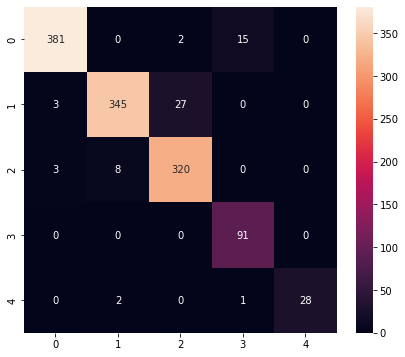

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       398
           1       0.97      0.92      0.95       375
           2       0.92      0.97      0.94       331
           3       0.85      1.00      0.92        91
           4       1.00      0.90      0.95        31

    accuracy                           0.95      1226
   macro avg       0.94      0.95      0.95      1226
weighted avg       0.95      0.95      0.95      1226



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [16]:
model.save(model_save_path, include_optimizer=False)

In [17]:
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\kusuma\AppData\Local\Temp\tmpsmg3xov_\assets


6400

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.4525195e-01 6.6214062e-02 5.0477851e-03 6.8313795e-01 3.4834250e-04]
3
